In [26]:
import main
from os import listdir
import pandas as pd
import TAtT
import Christofides
import time as T
import tracemalloc

In [18]:

df = pd.DataFrame({'Nome':['a'], 'Tamanho':[0], 'BnB':[0], 'timeBnB':[0], 'spaceBnB':[0], 'TAtT':[0], 'timeTAtT':[0], 'spaceTAtT':[0], 'Christofides':[0], 'timeChristofides':[0], 'spaceChristofides':[0]})

In [25]:
import signal
import time as T
from contextlib import contextmanager

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
        raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
        yield
    finally:
        signal.alarm(0)


In [ ]:
from os import listdir
files = list(listdir('ALL_tsp'))
filesizes = []
for file in files:
    with open('ALL_tsp/'+file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        parts = line.split()
        

        if parts[0] == "NAME":
            name = parts[2]  
            continue

        if parts[0] == "NAME:":
            name = parts[1]  
            continue

        if parts[0] == "DIMENSION":
            size = int(parts[2])
            filesizes.append((size,name))
            break

        if parts[0] == "DIMENSION:":
            size = int(parts[1])
            filesizes.append((size,name))
            break
with open('ordenado.txt','w') as f:
    for val,nome in sorted(filesizes):
        f.write(nome + ' ' + str(val) +'\n')


In [ ]:
# newrow = pd.DataFrame({'Name':['d18512.tsp'],'Val':[None],'time':[None],'space':[None]})


In [ ]:
# juntar = pd.read_csv('CSV/TAtT.csv')

In [27]:
aux = pd.read_csv('CSVbackup/TAtT_backup.csv')
# aux = aux['Name']
# # aux = aux[aux != 'a']
# aux = pd.concat([aux,newrow],ignore_index=True)           
# aux = aux.loc[:, ~aux.columns.str.contains('^Unnamed')]
# aux = pd.concat([aux, juntar], ignore_index=True)
# aux.to_csv('CSVbackup/TAtT_backup.csv')
# files = list(listdir('ALL_tsp'))
# files = [file for file in files if file not in aux.values]
# print(len(files))
# aux

In [ ]:
# aux = aux[aux['Name'] != 'a']
# aux.drop_duplicates(subset="Name")
# aux = aux.loc[:, ~aux.columns.str.contains('^Unnamed')]

# # Salvar o DataFrame sem as colunas "Unnamed"
# aux.to_csv('CSVbackup/TAtT_backup_clean.csv', index=False)
# print(aux)

           Name            Val    time     space
1     pr439.tsp  146846.650609    8.82  195056.0
2     rd100.tsp   10791.655816    0.09  102480.0
3    rl5934.tsp  842363.531789  798.65  269048.0
4    pcb442.tsp   69762.396742    1.34  165274.0
5     u2319.tsp  405732.655793   29.94  184296.0
..          ...            ...     ...       ...
78    pr152.tsp   92021.713842    0.13  155192.0
79    pr226.tsp  115264.012665    0.30  155248.0
80   vm1748.tsp  445935.551642   25.72  236760.0
81    pr144.tsp   80596.320048    0.14  130230.0
82  kroE100.tsp   30507.419047    0.05   89520.0

[78 rows x 4 columns]


In [20]:
# files = list(listdir('ALL_tsp'))
dfTAtT = pd.DataFrame({'Name':['a'],'Val':[0],'time':[0],'space':[0]})
for file in files:
    try:
        with time_limit(1800):
            name = file
            print(name)
            (G,_,_) = main.Graph('ALL_tsp/'+file)
            init = T.time()
            tracemalloc.start()
            snapshot1 = tracemalloc.take_snapshot()
            (_, W) = TAtT.TatT(G,1)
            snapshot2 = tracemalloc.take_snapshot()
            tracemalloc.stop()
            diferenca = snapshot2.compare_to(snapshot1, 'lineno')
            space = round(sum(abs(stat.size_diff) for stat in diferenca), 2)
            time = T.time() - init
            newrow = pd.DataFrame({'Name':[file],'Val':[W],'time':[round(time,2)],'space':[space]})
            dfTAtT = pd.concat([dfTAtT,newrow],ignore_index=True)
            dfTAtT.to_csv('CSV/TAtT.csv')
            print('add ',name,W,time,space)
    except TimeoutException as e:
        newrow = pd.DataFrame({'Name':[file],'Val':[None],'time':[1800],'space':[None]})
        dfTAtT = pd.concat([dfTAtT,newrow],ignore_index=True)
        dfTAtT.to_csv('CSV/TAtT.csv')
        print("Timed out! ",file)
dfTAtT = dfTAtT.drop([0], axis=0)


rl5915.tsp
add  rl5915.tsp 858988.7277412643 972.2903616428375 276200
st70.tsp
add  st70.tsp 873.3514856717352 0.11015796661376953 25745
rat99.tsp
add  rat99.tsp 1717.2816970707845 0.08935689926147461 94832
fl3795.tsp
add  fl3795.tsp 40756.44806515285 151.0750539302826 268488
u159.tsp
add  u159.tsp 58292.50842435215 0.19995379447937012 142526
kroA200.tsp
add  kroA200.tsp 40030.86635119212 0.23863697052001953 154628
u574.tsp
add  u574.tsp 49086.37285729394 1.8511340618133545 167600
pr1002.tsp
add  pr1002.tsp 351387.2202433054 5.513125896453857 171584
pr152.tsp
add  pr152.tsp 92021.71384204339 0.13132405281066895 155192
pr226.tsp
add  pr226.tsp 115264.0126646197 0.30127501487731934 155248
vm1748.tsp
add  vm1748.tsp 445935.551642111 25.716598987579346 236760
pr144.tsp
add  pr144.tsp 80596.32004796875 0.13529515266418457 130230
kroE100.tsp
add  kroE100.tsp 30507.419046823474 0.05308389663696289 89520


In [ ]:
# files = list(listdir('ALL_tsp'))
dfChristofides = pd.DataFrame({'Name':['a'],'Val':[0],'time':[0],'space':[0]})
for file in files:
    try:
        with time_limit(65):
            name = file
            print(name)
            (G,_,_) = main.Graph('ALL_tsp/'+file)
            init = T.time()
            tracemalloc.start()
            snapshot1 = tracemalloc.take_snapshot()
            (_, W) = Christofides.Christofides(G,1)
            time = T.time() - init
            snapshot2 = tracemalloc.take_snapshot()
            tracemalloc.stop()      
            diferenca = snapshot2.compare_to(snapshot1, 'lineno')
            space = round(sum(abs(stat.size_diff) for stat in diferenca), 2)
            newrow = pd.DataFrame({'Name':[file],'Val':[W],'time':[time],'space':[space]})
            dfChristofides = pd.concat([dfChristofides,newrow],ignore_index=True)
            dfChristofides.to_csv('CSV/Christofides.csv')
            print('add ',name,W,time,space)
    except TimeoutException as e:
        newrow = pd.DataFrame({'Name':[file],'Val':[None],'time':[30],'space':[None]})
        dfChristofides = pd.concat([dfChristofides,newrow],ignore_index=True)
        dfTAtT.to_csv('CSV/TAtT.csv')
        print("Timed out! ",file)
dfChristofides = dfChristofides.drop([0],axis=0)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df1 = pd.read_csv('CSVbackup/TAtT_backup_clean.csv')
df1.columns = ['Name','TAtT_Cost','TAtT_Time','TAtT_Space']
df1['Name'] = df1['Name'].str[:-4]
#df1.head()
df1[df1['Name'] == 'berlin52']

,Name,TAtT_Cost,TAtT_Time,TAtT_Space
20,berlin52,10116.014496,0.01,3376.0


In [15]:
df2 = pd.read_csv('CSVbackup/Christofides_backup_clean.csv')
df2 = df2.drop(columns=['Unnamed: 0'])
df2.columns = ['Name','Chris_Cost','Chris_Time','Chris_Space']
df2.head()

,Name,Chris_Cost,Chris_Time,Chris_Space
0,eil51,607.021350,0.626529,548348.0
1,berlin52,9142.320920,0.119391,117742.0
2,st70,926.496886,0.106982,304414.0
3,eil76,702.862856,0.139741,328156.0
4,pr76,129685.650181,0.091125,333166.0


In [152]:
df0 = pd.merge(df2,df1,on='Name',how='right')
with open('otimo.txt') as f:
    lines  = f.readlines()

dfOtimo = pd.DataFrame({'Name':['a'],'Otimo':[0]})
for line in lines:
    split =  line.split()
    name = split[0]
    otimo = int(split[2])
    dfaux = pd.DataFrame({'Name':[name],'Otimo':[otimo]})
    dfOtimo = pd.concat([dfOtimo,dfaux])
dfOtimo = dfOtimo.iloc[1:]

df0 = pd.merge(df0,dfOtimo,on='Name',how='right')
df0 = df0.dropna(subset=['Chris_Time'])

with open('ordenado.txt') as f:
    lines  = f.readlines()

dfTamanho = pd.DataFrame({'Name':['a'],'Tamanho':[0]})
for line in lines:
    split =  line.split()
    name = split[0]
    size = int(split[1])
    dfaux = pd.DataFrame({'Name':[name],'Tamanho':[size]})
    dfTamanho = pd.concat([dfTamanho,dfaux])
dfTamanho = dfTamanho.iloc[1:]

df0 = pd.merge(df0,dfTamanho,on='Name',how='right')
df0 = df0.dropna(subset=['Chris_Time'])

df0['Chris_Ratio'] = df0['Chris_Cost']/df0['Otimo']
df0['TAtT_Ratio'] = df0['TAtT_Cost']/df0['Otimo']

df0['Chris_Space'] = df0['TAtT_Space']/1000
df0['TAtT_Space'] = df0['TAtT_Space']/1000

cols = (['Name', 'Tamanho','Otimo','Chris_Cost','Chris_Ratio','TAtT_Cost','TAtT_Ratio'
         ,'Chris_Time','TAtT_Time','Chris_Space','TAtT_Space'])
df0 = df0[cols]

df0.to_csv('CSVbackup/completa.csv')

In [ ]:
#Graficos = tempo/tamanho, espaço/tamanho, ratio/tamanho

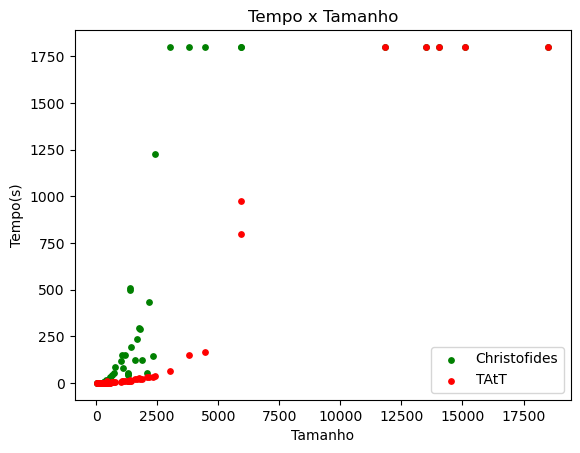

In [112]:
plt.scatter(df0['Tamanho'], df0['Chris_Time'], label='Christofides',color='g',s=15)
plt.scatter(df0['Tamanho'], df0['TAtT_Time'], label='TAtT',color='r',s=15)

# Adding labels and title
plt.ylabel('Tempo(s)')
plt.xlabel('Tamanho')
plt.title('Tempo x Tamanho')
plt.legend()

# Show the plot
plt.show()

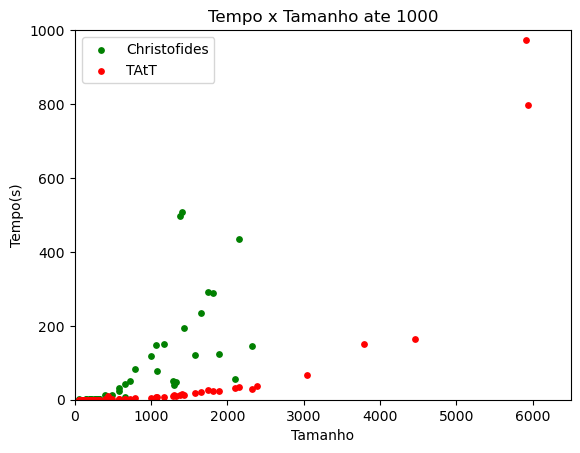

In [113]:
plt.scatter(df0['Tamanho'], df0['Chris_Time'], label='Christofides',color='g',s=15)
plt.scatter(df0['Tamanho'], df0['TAtT_Time'], label='TAtT',color='r',s=15)

# Adding labels and title
plt.ylabel('Tempo(s)')
plt.xlabel('Tamanho')
plt.title('Tempo x Tamanho ate 1000')
plt.legend()


plt.xlim(0, 6500)  # Limiting x-axis from 0 to 6
plt.ylim(0, 1000)  # Limiting y-axis from 0 to 6

# Show the plot
plt.show()

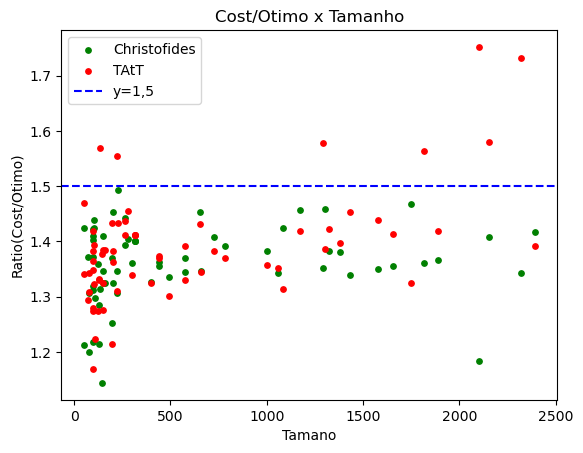

In [151]:
plt.scatter(df0['Tamanho'], df0['Chris_Ratio'], label='Christofides',color='g',s=15)
plt.scatter(df0['Tamanho'], df0['TAtT_Ratio'], label='TAtT',color='r',s=15)

# Adding labels and title
plt.axhline(y=1.5, color='b', linestyle='--', label='y=1,5')
plt.ylabel('Ratio(Cost/Otimo)')
plt.xlabel('Tamano')
plt.title('Cost/Otimo x Tamanho')
plt.legend()

# Show the plot
plt.show()

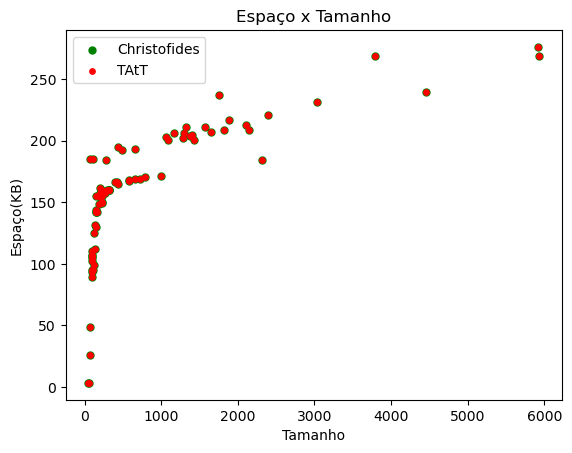

In [149]:
plt.scatter(df0['Tamanho'], df0['Chris_Space'], label='Christofides',color='g',s=25)
plt.scatter(df0['Tamanho'], df0['TAtT_Space'], label='TAtT',color='r',s=15)

# Adding labels and title
plt.ylabel('Espaço(KB)')
plt.xlabel('Tamanho')
plt.title('Espaço x Tamanho')
plt.legend()

# Show the plot
plt.show()